In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
hr = pd.read_csv("C:/Python/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.dtypes

In [5]:
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

In [7]:
y.value_counts()

left
0    11428
1     3567
Name: count, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)

In [11]:
y_pred_prob

array([[0.6307529 , 0.3692471 ],
       [0.59872989, 0.40127011],
       [0.53628267, 0.46371733],
       ...,
       [0.93960213, 0.06039787],
       [0.94169255, 0.05830745],
       [0.79895416, 0.20104584]])

In [14]:
a = np.array([9,4,5,89,23,45])
a.argmax() , a.max()

(3, 89)

In [17]:
a = np.array([[9, 19],
              [34, 2],
              [56, 46],
              [102,200]])
a.argmax(axis=1)

array([1, 0, 0, 1], dtype=int64)

In [20]:
y_pred = y_pred_prob.argmax(axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

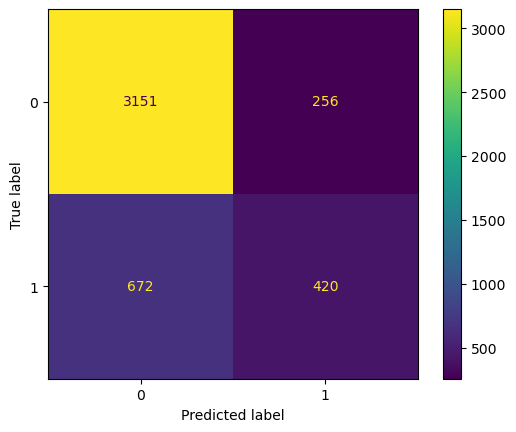

In [24]:
disp = ConfusionMatrixDisplay( confusion_matrix(y_test, y_pred) )
disp.plot()
plt.show()

In [25]:
(3151+420)/(3150+420+256+672)

0.7939084037349934

In [26]:
accuracy_score( y_test, y_pred  )

0.793731940431207

Above code in short

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # applies argmax to predicted probabilities matrix
accuracy_score( y_test, y_pred )

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.793731940431207

In [29]:
y.value_counts()

left
0    11428
1     3567
Name: count, dtype: int64

In [31]:
y.value_counts(normalize=True)*100

left
0    76.212071
1    23.787929
Name: proportion, dtype: float64

In [33]:
y_train.value_counts(normalize=True)*100

left
0    76.419588
1    23.580412
Name: proportion, dtype: float64

In [34]:
y_test.value_counts(normalize=True)*100

left
0    75.72794
1    24.27206
Name: proportion, dtype: float64

Stratification of Sampling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [ ]:
y_train.value_counts(normalize=True)*100

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64

In [45]:
y_test.value_counts(normalize=True)*100

left
0    76.216937
1    23.783063
Name: proportion, dtype: float64

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # applies argmax to predicted probabilities matrix
accuracy_score( y_test, y_pred )

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.808179595465659

In [ ]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # applies argmax to predicted probabilities matrix
accuracy_score( y_test, y_pred )

0.8017337186041342

In [50]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # applies argmax to predicted probabilities matrix
accuracy_score( y_test, y_pred )

0.7990664592131584

In [54]:
solver = 'saga'
penalties = ['l2','l1','elasticnet',None]
scores = []
for p in penalties:
    lr = LogisticRegression(solver=solver, penalty=p, l1_ratio=0.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append([p, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame( scores, columns=['penalty','score'] )
df_scores.sort_values('score', ascending=False)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\

,penalty,score
0,l2,0.757724
1,l1,0.757724
2,elasticnet,0.757724
3,None,0.757724


In [56]:
solver = ['sag','newton-cg','newton-cholesky','lbfgs']
penalties = ['l2',None]
scores = []
for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p,s, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame( scores, columns=['penalty','solver','score'] )
df_scores.sort_values('score', ascending=False)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\s

,penalty,solver,score
7,None,lbfgs,0.809069
3,l2,lbfgs,0.808180
2,l2,newton-cholesky,0.799066
6,None,newton-cholesky,0.799066
1,l2,newton-cg,0.798844
5,None,newton-cg,0.798622
4,None,sag,0.750834
0,l2,sag,0.750611


#### Wisconsin Cancer Dataset

In [57]:
wisconsin = pd.read_csv("C:/Python/Cases/Wisconsin/BreastCancer.csv", index_col=0)
X = wisconsin.drop('Class', axis=1)
y = wisconsin['Class']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [60]:
solver = 'saga'
penalties = ['l2','l1','elasticnet',None]
scores = []
for p in penalties:
    lr = LogisticRegression(solver=solver, penalty=p, l1_ratio=0.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append([p, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame( scores, columns=['penalty','score'] )
df_scores.sort_values('score', ascending=False)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\

,penalty,score
0,l2,0.966667
1,l1,0.966667
2,elasticnet,0.966667
3,None,0.966667


In [61]:
solver = ['sag','newton-cg','newton-cholesky','lbfgs']
penalties = ['l2',None]
scores = []
for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p,s, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame( scores, columns=['penalty','solver','score'] )
df_scores.sort_values('score', ascending=False)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,solver,score
0,l2,sag,0.966667
1,l2,newton-cg,0.966667
2,l2,newton-cholesky,0.966667
3,l2,lbfgs,0.966667
4,None,sag,0.966667
5,None,newton-cg,0.966667
6,None,newton-cholesky,0.966667
7,None,lbfgs,0.966667


In [62]:
lr.coef_

array([[ 0.56041373,  0.02743729,  0.21987407,  0.19843066, -0.01441944,
         0.40169326,  0.63175691,  0.19648414,  0.60075886]])

In [63]:
lr.intercept_

array([-10.38524275])